# Logistic Regression

Logistic Regression is a misnomer(ग़लत नाम). Although it says Regression but its a classification model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [4]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
# Find the length of the dataset

dataset.shape

(400, 5)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


- There are no NULLs in dataset 

In [7]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
dataset.groupby('Purchased').count() ['User ID']

Purchased
0    257
1    143
Name: User ID, dtype: int64

In [9]:
dataset.groupby(['Gender','Purchased','Gender']).count() 

User ID  Age  EstimatedSalary
Gender Purchased Gender                               
Female 0         Female      127  127              127
       1         Female       77   77               77
Male   0         Male        130  130              130
       1         Male         66   66               66

In [10]:
77/(127+77) # chances of female purchasers

0.37745098039215685

In [11]:
66/(130+66) # chances of male purchasers

0.336734693877551

In [12]:
400*0.357500

143.0

We have got a substantial representation of the minority class so this is a balanced dataset

In [13]:
#dataset.groupby('Purchased').mean() ------> ye ni ho rha hai

- People with higher ages tend to purchase more

- People with higher ages tend to purchase more

In [14]:
import seaborn as sns

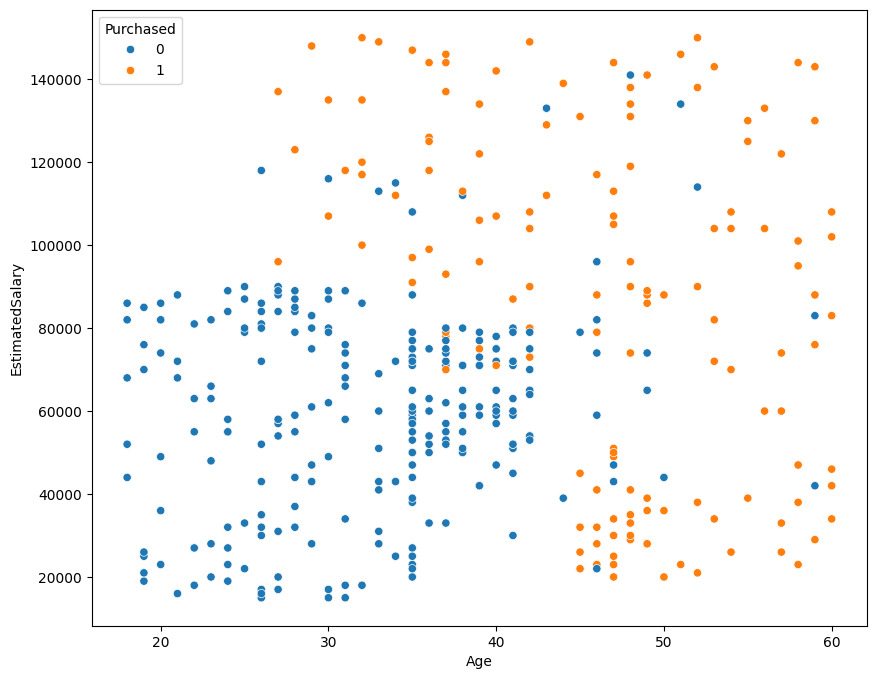

In [15]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Age', y = 'EstimatedSalary', hue = 'Purchased',data= dataset)
plt.show()

In [16]:
# Declare the Independent and Dependent variables
x= dataset[['Age','EstimatedSalary','Gender']]
y= dataset[['Purchased']]

In [17]:
x = pd.get_dummies(x,drop_first=True)

In [18]:
x

,Age,EstimatedSalary,Gender_Male
0,19,19000,True
1,35,20000,True
2,26,43000,False
3,27,57000,False
4,19,76000,True
...,...,...,...
395,46,41000,False
396,51,23000,True
397,50,20000,False
398,36,33000,True


In [19]:
#  split the dataset in train and test 

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size =0.2 ,random_state=0)

In [20]:
x_train

,Age,EstimatedSalary,Gender_Male
336,58,144000,True
64,59,83000,False
55,24,55000,False
106,26,35000,False
300,58,38000,False
...,...,...,...
323,48,30000,False
192,29,43000,True
117,36,52000,True
47,27,54000,False


# **Feature Scaling ->** 
- Feature scaling can improve the convergence speed of gradient descent algorithms by ensuring a smoother and faster path to the minimum.
- It enhances the performance of models like Support Vector Machines (SVM) and k-nearest neighbours (k-NN) that are sensitive to the range of data points.
- Feature scaling is a method used to normalize the range of independent variables or features of data.

In [21]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[['Age','EstimatedSalary']] = sc.fit_transform(x_train[['Age','EstimatedSalary']])
x_test[['Age','EstimatedSalary']] = sc.transform(x_test[['Age','EstimatedSalary']])


In [22]:
x_train

,Age,EstimatedSalary,Gender_Male
336,1.922950,2.146016,True
64,2.020161,0.378719,False
55,-1.382215,-0.432499,False
106,-1.187794,-1.011940,False
300,1.922950,-0.925024,False
...,...,...,...
323,0.950843,-1.156800,False
192,-0.896162,-0.780164,True
117,-0.215686,-0.519415,True
47,-1.090583,-0.461471,False


In [23]:
# Fitting the Logistic Regression Model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_pred = classifier.predict(x_test)

In [25]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [26]:
y_test

,Purchased
132,0
309,0
341,0
196,0
246,0
...,...
14,0
363,0
304,0
361,1


In [27]:
dataset.drop(['Gender'],axis=1)

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0
...,...,...,...,...
395,15691863,46,41000,1
396,15706071,51,23000,1
397,15654296,50,20000,1
398,15755018,36,33000,0


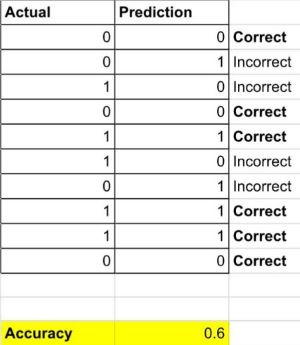

In [28]:
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score,recall_score
acc = accuracy_score(y_pred,y_test)
cf = confusion_matrix(y_pred,y_test)
precision = precision_score(y_pred,y_test)
recall= recall_score(y_pred,y_test)

<Axes: >

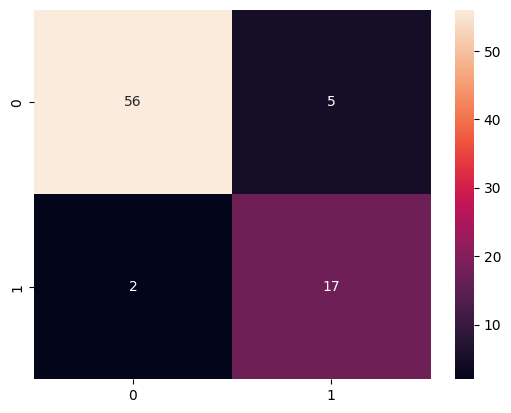

In [29]:
sns.heatmap(cf,annot= True)

In [30]:
print("Accuracy:" ,accuracy)
print("Precision:" ,precision)
print("Recall:" ,recall)

NameError: name 'accuracy' is not defined

**True Positives = 56,
  True Negatives = 17,
  False Positives = 5,
  False Negatives = 2**

In [35]:
Correct_prediction = 74
Wrong_prediction =6

accuracy = 74/80

In [36]:
accuracy

0.925